In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline, UnivariateSpline

In [2]:
#Importo file NoLockdown
inf_NL = pd.read_csv("./output-NoLockdown/infections.txt", sep="\t")
inf_NL_T = pd.read_csv("./output-NoLockdown_Tracciamento/infections.txt", sep="\t")
inf_NL_T_M = pd.read_csv("./output-NoLockdown_Tracciamento_Mask/infections.txt", sep="\t")
inf_NL_M = pd.read_csv("./output-NoLockdown_Mask/infections.txt", sep="\t")

events_NL = pd.read_csv("./output-NoLockdown/infectionEvents.txt", sep="\t")
events_NL_T = pd.read_csv("./output-NoLockdown_Tracciamento/infectionEvents.txt", sep="\t")
events_NL_M = pd.read_csv("./output-NoLockdown_Mask/infectionEvents.txt", sep="\t")
events_NL_T_M = pd.read_csv("./output-NoLockdown_Tracciamento_Mask/infectionEvents.txt", sep="\t")

In [3]:
#Importo file Zona Rossa
inf_ZR_T = pd.read_csv("./output-ZonaRossa_Tracciamento/infections.txt", sep="\t")
inf_ZR = pd.read_csv("./output-ZonaRossa/infections.txt", sep="\t")

events_ZR_T = pd.read_csv("./output-ZonaRossa_Tracciamento/infectionEvents.txt", sep="\t")

In [4]:
#Importo file Zona Arancione
inf_ZA_T = pd.read_csv("./output-ZonaArancione_Tracciamento/infections.txt", sep="\t")
inf_ZA = pd.read_csv("./output-ZonaArancione/infections.txt", sep="\t")

events_ZA_T = pd.read_csv("./output-ZonaArancione_Tracciamento/infectionEvents.txt", sep="\t")

In [5]:
#Importo file Zona Gialla
inf_ZG_T = pd.read_csv("./output-ZonaGialla_Tracciamento/infections.txt", sep="\t")
inf_ZG = pd.read_csv("./output-ZonaGialla/infections.txt", sep="\t")

events_ZG_T = pd.read_csv("./output-ZonaGialla_Tracciamento/infectionEvents.txt", sep="\t")

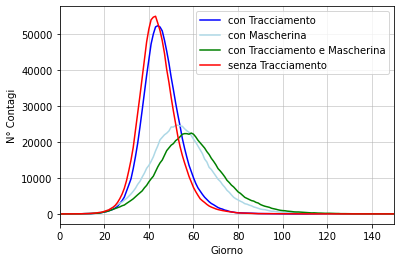

In [23]:
#Plot infezioni NoLockdown - Linear
fig, ax = plt.subplots()
ax.set_xlim(0, 150)
ax.plot(inf_NL_T['day'],inf_NL_T['nContagious'],label='con Tracciamento',color='blue')
ax.plot(inf_NL_M['day'],inf_NL_M['nContagious'],label='con Mascherina',color='lightblue')
ax.plot(inf_NL_T_M['day'],inf_NL_T_M['nContagious'],label='con Tracciamento e Mascherina',color='green')
ax.plot(inf_NL['day'],inf_NL['nContagious'],label='senza Tracciamento',color='red')

ax.set(xlabel='Giorno', ylabel='N° Contagi')
ax.legend(loc='best')
ax.grid(linewidth=0.5)

fig.savefig("No lockdown plot linear.png",dpi=300,bbox_inches = "tight")
plt.show()

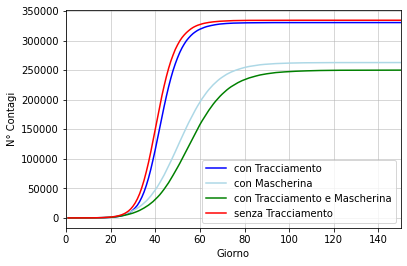

In [24]:
#Plot infezioni NoLockdown - Log
fig, ax = plt.subplots()
ax.set_xlim(0, 150)
ax.plot(inf_NL_T['day'],inf_NL_T['nContagiousCumulative'],label='con Tracciamento',color='blue')
ax.plot(inf_NL_M['day'],inf_NL_M['nContagiousCumulative'],label='con Mascherina',color='lightblue')
ax.plot(inf_NL_T_M['day'],inf_NL_T_M['nContagiousCumulative'],label='con Tracciamento e Mascherina',color='green')
ax.plot(inf_NL['day'],inf_NL['nContagiousCumulative'],label='senza Tracciamento',color='red')

ax.set(xlabel='Giorno', ylabel='N° Contagi')
ax.legend(loc='best')
ax.grid(linewidth=0.5)

fig.savefig("No lockdown plot log.png",dpi=300,bbox_inches = "tight")
plt.show()

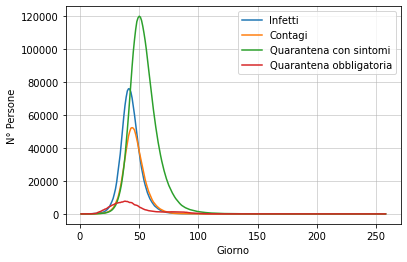

In [9]:
#Plot Quarantena NoLockdown - Solo tracciamento
fig, ax = plt.subplots()
ax.plot(inf_NL_T['day'], inf_NL_T['nInfectedButNotContagious'],label='Infetti')
ax.plot(inf_NL_T['day'], inf_NL_T['nContagious'],label='Contagi')
ax.plot(inf_NL_T['day'], inf_NL_T['nInQuarantineFull'],label='Quarantena con sintomi')
ax.plot(inf_NL_T['day'], inf_NL_T['nInQuarantineHome'],label='Quarantena obbligatoria')
ax.set(xlabel='Giorno', ylabel='N° Persone')
ax.legend(loc='best')
ax.grid(linewidth=0.5)

fig.savefig("Quarantena Open solo Tracciamento.png",dpi=300)
plt.show()

____________________

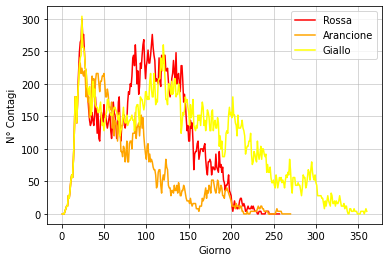

In [47]:
#Plot Contagiosi Zone colorate - Senza Tracciamento
fig, ax = plt.subplots()
ax.plot(inf_ZR['day'], inf_ZR['nContagious'],label='Rossa',color="red")
ax.plot(inf_ZA['day'], inf_ZA['nContagious'],label='Arancione',color="orange")
ax.plot(inf_ZG['day'], inf_ZG['nContagious'],label='Giallo',color="yellow")
ax.set(xlabel='Giorno', ylabel='N° Contagi')
ax.legend(loc='best')
ax.grid(linewidth=0.5)

fig.savefig("Zone senza tracciamento plot.png",dpi=300)
plt.show()

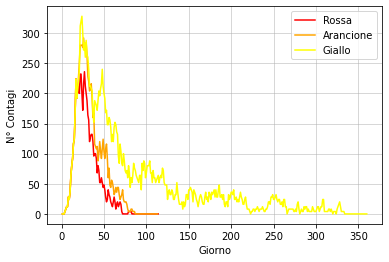

In [48]:
#Plot Contagiosi Zone colorate - Con Tracciamento
fig, ax = plt.subplots()
ax.plot(inf_ZR_T['day'], inf_ZR_T['nContagious'],label='Rossa',color="red")
ax.plot(inf_ZA_T['day'], inf_ZA_T['nContagious'],label='Arancione',color="orange")
ax.plot(inf_ZG_T['day'], inf_ZG_T['nContagious'],label='Giallo',color="yellow")
ax.set(xlabel='Giorno', ylabel='N° Contagi')
ax.legend(loc='best')
ax.grid(linewidth=0.5)

fig.savefig("Zone con tracciamento plot.png",dpi=300)
plt.show()

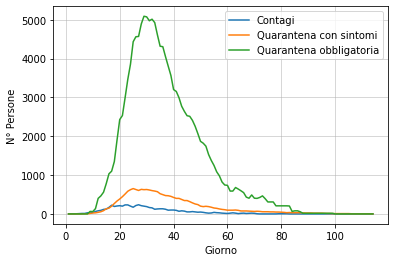

In [49]:
#Plot Quarantena Zona Rossa
fig, ax = plt.subplots()
ax.plot(inf_ZR_T['day'], inf_ZR_T['nContagious'],label='Contagi')
ax.plot(inf_ZR_T['day'], inf_ZR_T['nInQuarantineFull'],label='Quarantena con sintomi')
ax.plot(inf_ZR_T['day'], inf_ZR_T['nInQuarantineHome'],label='Quarantena obbligatoria')
ax.set(xlabel='Giorno', ylabel='N° Persone')
ax.legend(loc='best')
ax.grid(linewidth=0.5)

fig.savefig("Quarantena Rossa plot.png",dpi=300)
plt.show()

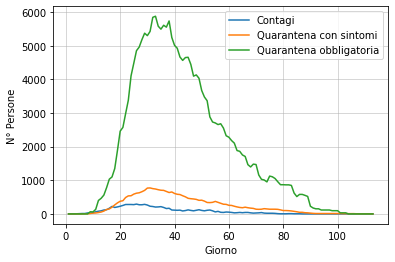

In [61]:
#Plot Quarantena Zona Arancione
fig, ax = plt.subplots()
ax.plot(inf_ZA_T['day'], inf_ZA_T['nContagious'],label='Contagi')
ax.plot(inf_ZA_T['day'], inf_ZA_T['nInQuarantineFull'],label='Quarantena con sintomi')
ax.plot(inf_ZA_T['day'], inf_ZA_T['nInQuarantineHome'],label='Quarantena obbligatoria')
ax.set(xlabel='Giorno', ylabel='N° Persone')
ax.legend(loc='best')
ax.grid(linewidth=0.5)

fig.savefig("Quarantena Arancione plot.png",dpi=300)
plt.show()

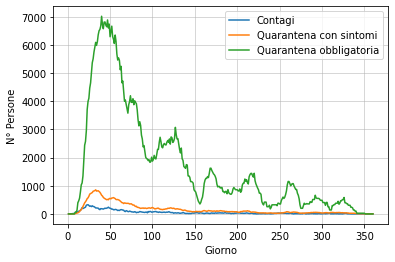

In [62]:
#Plot Quarantena Zona Gialla
fig, ax = plt.subplots()
ax.plot(inf_ZG_T['day'], inf_ZG_T['nContagious'],label='Contagi')
ax.plot(inf_ZG_T['day'], inf_ZG_T['nInQuarantineFull'],label='Quarantena con sintomi')
ax.plot(inf_ZG_T['day'], inf_ZG_T['nInQuarantineHome'],label='Quarantena obbligatoria')
ax.set(xlabel='Giorno', ylabel='N° Persone')
ax.legend(loc='best')
ax.grid(linewidth=0.5)

fig.savefig("Quarantena Gialla plot.png",dpi=300)
plt.show()

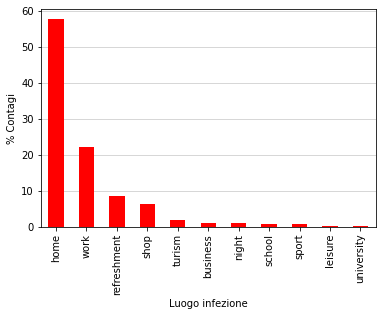

In [16]:
#Bar luoghi infezione Zona Rossa
iT_ZR_T = events_ZR_T.infectionType
iT_ZR_T = iT_ZR_T.str.split('_', expand=True)[0]

fig = plt.figure()

iT_ZR_T = 100*iT_ZR_T.value_counts() / len(iT_ZR_T) #Percentuale
iT_ZR_T.sort_index()
iT_ZR_T.plot(kind='bar',xlabel="Luogo infezione",ylabel="% Contagi", color="red")
plt.grid(linewidth=0.5,axis="y")
plt.rc('axes', axisbelow=True)

fig.savefig('Luoghi Rossa Tracciamento.png',dpi=300,bbox_inches = "tight")

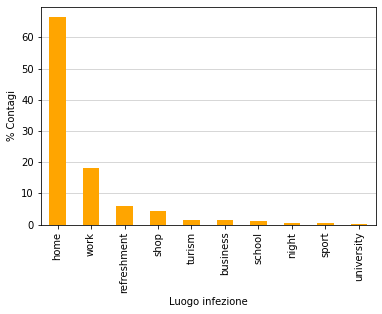

In [15]:
#Bar luoghi infezione Zona Arancione
iT_ZA_T = events_ZA_T.infectionType
iT_ZA_T = iT_ZA_T.str.split('_', expand=True)[0]

fig = plt.figure()

iT_ZA_T = 100*iT_ZA_T.value_counts() / len(iT_ZA_T) #Percentuale
iT_ZA_T.sort_index()
iT_ZA_T.plot(kind='bar',xlabel="Luogo infezione",ylabel="% Contagi", color="orange")
plt.grid(linewidth=0.5,axis="y")
plt.rc('axes', axisbelow=True)

fig.savefig('Luoghi Arancione Tracciamento.png',dpi=300,bbox_inches = "tight")

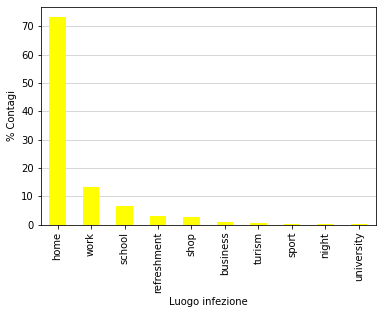

In [14]:
#Bar luoghi infezione Zona Gialla
iT_ZG_T = events_ZG_T.infectionType
iT_ZG_T = iT_ZG_T.str.split('_', expand=True)[0]

fig = plt.figure()

iT_ZG_T = 100*iT_ZG_T.value_counts() / len(iT_ZG_T) #Percentuale
iT_ZG_T.sort_index()
iT_ZG_T.plot(kind='bar',xlabel="Luogo infezione",ylabel="% Contagi",color="yellow")
plt.grid(linewidth=0.5,axis="y")
plt.rc('axes', axisbelow=True)

fig.savefig('Luoghi Gialla Tracciamento.png',dpi=300,bbox_inches = "tight")

AttributeError: module 'matplotlib.pyplot' has no attribute 'patches'

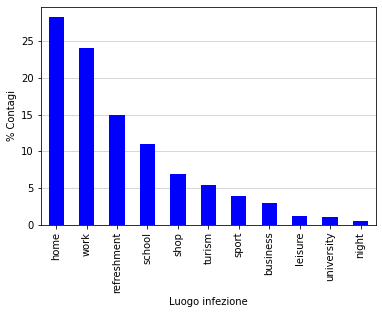

In [60]:
#Bar luoghi infezione NoLockdown - Tracciamento
iT_NL_T = events_NL_T.infectionType
iT_NL_T = iT_NL_T.str.split('_', expand=True)[0]

fig = plt.figure()

iT_NL_T = 100*iT_NL_T.value_counts() / len(iT_NL_T) #Percentuale
iT_NL_T.sort_index()
iT_NL_T.plot(kind='bar',xlabel="Luogo infezione",ylabel="% Contagi",color="blue")
plt.grid(linewidth=0.5,axis="y")

fig.savefig('Luoghi Open Tracciamento.png',dpi=300,bbox_inches = "tight")

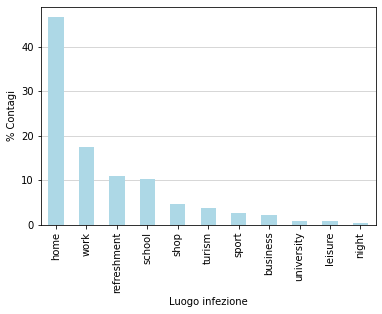

In [40]:
#Bar luoghi infezione NoLockdown - Solo mascherina
iT_NL_M = events_NL_M.infectionType
iT_NL_M = iT_NL_M.str.split('_', expand=True)[0]

fig = plt.figure()

iT_NL_M = 100*iT_NL_M.value_counts() / len(iT_NL_M) #Percentuale
iT_NL_M.sort_index()
iT_NL_M.plot(kind='bar',xlabel="Luogo infezione",ylabel="% Contagi",color="lightblue")
plt.grid(linewidth=0.5,axis="y")
plt.rc('axes', axisbelow=True)
fig.savefig('Luoghi Open Mascherina.png',dpi=300,bbox_inches = "tight")

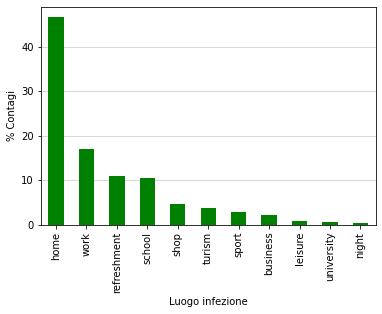

In [41]:
#Bar luoghi infezione NoLockdown - Tracciamento e Mascherina
iT_NL_T_M = events_NL_T_M.infectionType
iT_NL_T_M = iT_NL_T_M.str.split('_', expand=True)[0]

fig = plt.figure()

iT_NL_T_M = 100*iT_NL_T_M.value_counts() / len(iT_NL_T_M) #Percentuale
iT_NL_T_M.sort_index()
iT_NL_T_M.plot(kind='bar',xlabel="Luogo infezione",ylabel="% Contagi",color="green")
plt.grid(linewidth=0.5,axis="y")
plt.rc('axes', axisbelow=True)
fig.savefig('Luoghi Open Tracciamento Mascherina.png',dpi=300,bbox_inches = "tight")

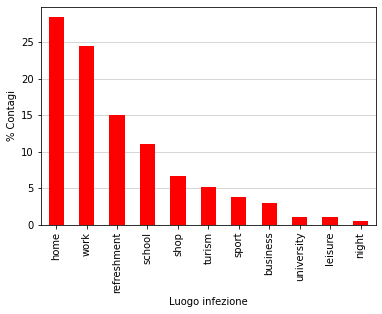

In [42]:
#Bar luoghi infezione NoLockdown - No limitazioni
iT_NL = events_NL.infectionType
iT_NL = iT_NL.str.split('_', expand=True)[0]

fig = plt.figure()

iT_NL = 100*iT_NL.value_counts() / len(iT_NL) #Percentuale
iT_NL.sort_index()
iT_NL.plot(kind='bar',xlabel="Luogo infezione",ylabel="% Contagi",color="red")
plt.grid(linewidth=0.5,axis="y")
plt.rc('axes', axisbelow=True)
fig.savefig('Luoghi Open.png',dpi=300,bbox_inches = "tight")